<a href="https://colab.research.google.com/github/sjmama/sem/blob/main/%EC%9D%B4%EC%83%81%EC%B9%98_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# 필요한 패키지 설치
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['figure.dpi'] = 300

In [13]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
df = pd.read_csv("heart_2020_cleaned.csv")

# 데이터 샘플 확인
df.head(40)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [14]:
# BMI 컬럼의 분포 확인

df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

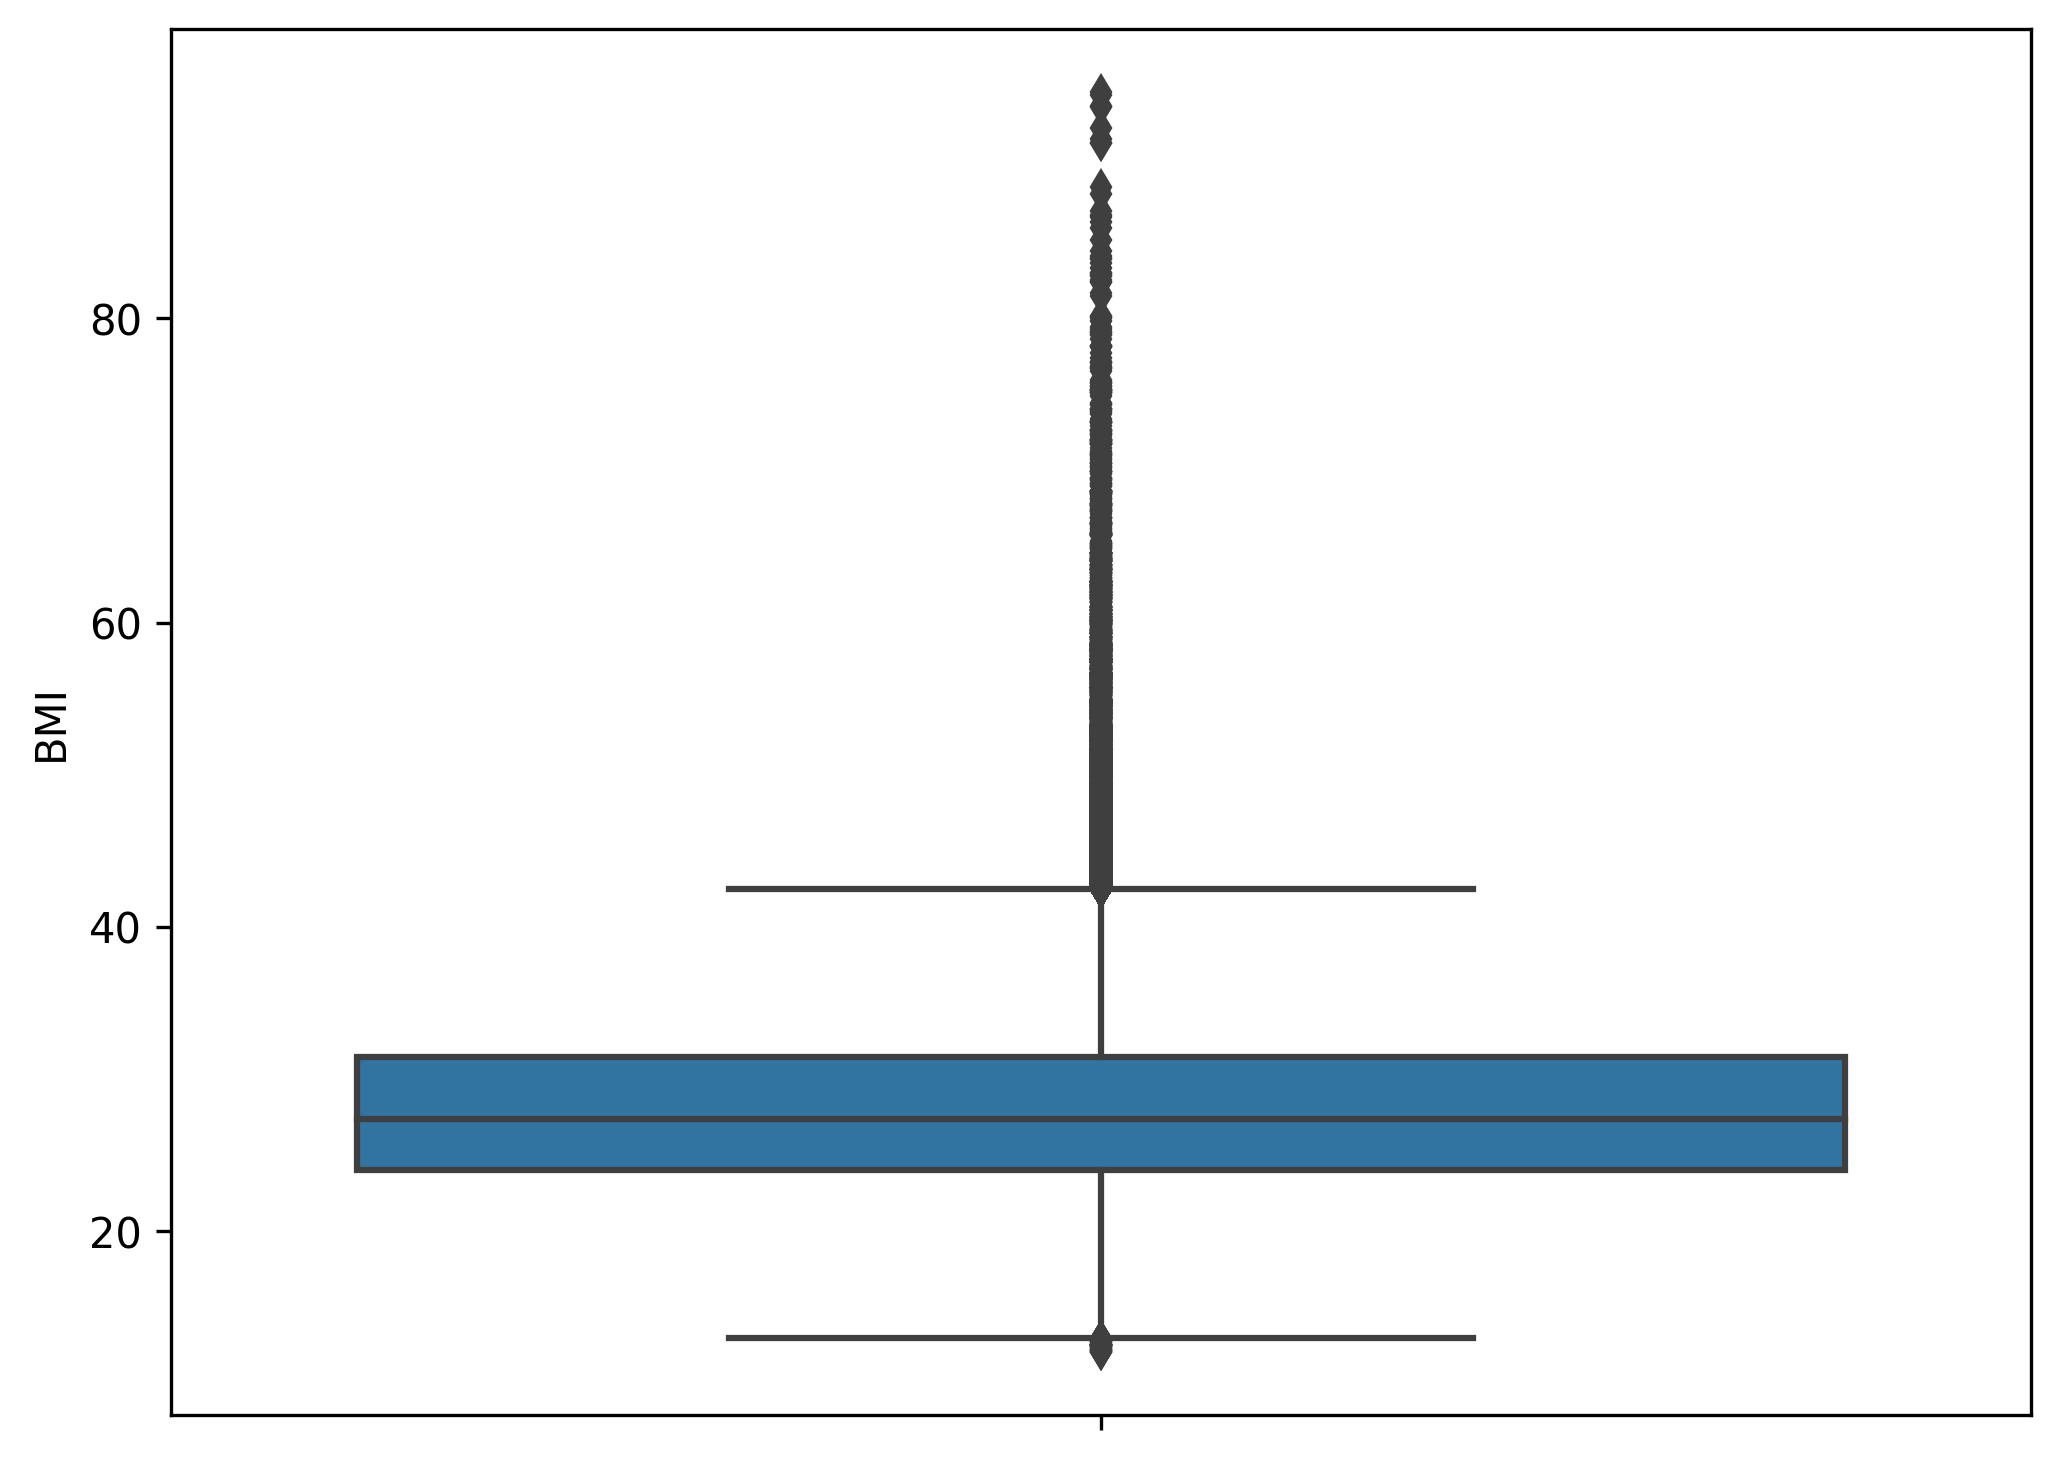

In [15]:
plt.figure(figsize = (8, 6))
sns.boxplot(y = 'BMI', data = df)
plt.show()

In [16]:
# BMI 컬럼의 이상치 제거 (IQR*3)

# Q!, Q3 범위 정의
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1    #IQR 범위.
rev_range = 3  # 제거 범위 조절 변수 설정

# 이상치 범위 설정
filter = (df['BMI'] >= Q1 - rev_range * IQR) & (df['BMI'] <= Q3 + rev_range *IQR)
df_rmv = df.loc[filter]
print(df['BMI'].describe())
print(df_rmv['BMI'].describe())

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64
count    318477.000000
mean         28.193173
std           6.010014
min          12.020000
25%          24.020000
50%          27.320000
75%          31.320000
max          53.590000
Name: BMI, dtype: float64


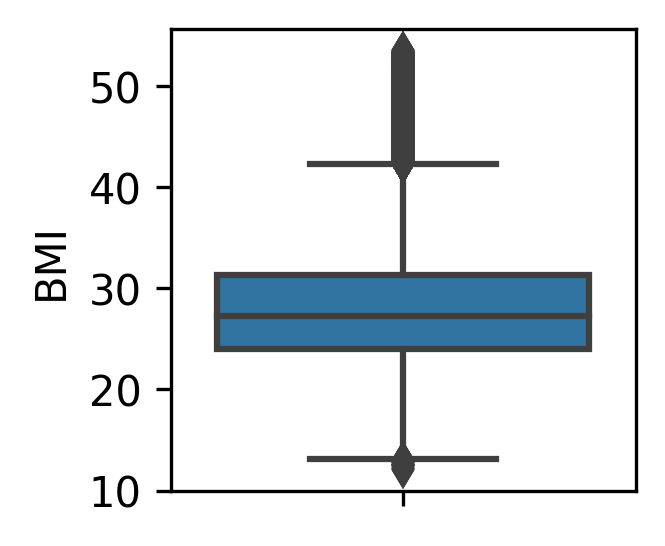

In [20]:
plt.figure(figsize = (2,2))
sns.boxplot(y = 'BMI', data = df_rmv)
plt.show()